<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Preamble" data-toc-modified-id="Preamble-0"><span class="toc-item-num">0&nbsp;&nbsp;</span>Preamble</a></span><ul class="toc-item"><li><span><a href="#Some-general-parameters" data-toc-modified-id="Some-general-parameters-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Some general parameters</a></span></li><li><span><a href="#Functions" data-toc-modified-id="Functions-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>Functions</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Calculate-relevant-connectivities" data-toc-modified-id="Calculate-relevant-connectivities-0.2.0.1"><span class="toc-item-num">0.2.0.1&nbsp;&nbsp;</span>Calculate relevant connectivities</a></span></li><li><span><a href="#Strings-of-labels-and-keys-and-legends" data-toc-modified-id="Strings-of-labels-and-keys-and-legends-0.2.0.2"><span class="toc-item-num">0.2.0.2&nbsp;&nbsp;</span>Strings of labels and keys and legends</a></span></li><li><span><a href="#Calculate-connectivities" data-toc-modified-id="Calculate-connectivities-0.2.0.3"><span class="toc-item-num">0.2.0.3&nbsp;&nbsp;</span>Calculate connectivities</a></span></li><li><span><a href="#Plot-weights" data-toc-modified-id="Plot-weights-0.2.0.4"><span class="toc-item-num">0.2.0.4&nbsp;&nbsp;</span>Plot weights</a></span></li><li><span><a href="#Plot-B" data-toc-modified-id="Plot-B-0.2.0.5"><span class="toc-item-num">0.2.0.5&nbsp;&nbsp;</span>Plot B</a></span></li><li><span><a href="#Plot-rest-weights" data-toc-modified-id="Plot-rest-weights-0.2.0.6"><span class="toc-item-num">0.2.0.6&nbsp;&nbsp;</span>Plot rest weights</a></span></li><li><span><a href="#Plot-persistence-times" data-toc-modified-id="Plot-persistence-times-0.2.0.7"><span class="toc-item-num">0.2.0.7&nbsp;&nbsp;</span>Plot persistence times</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Characterising-weights-and-B" data-toc-modified-id="Characterising-weights-and-B-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Characterising weights and B</a></span><ul class="toc-item"><li><span><a href="#An-example" data-toc-modified-id="An-example-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>An example</a></span></li><li><span><a href="#Systematic" data-toc-modified-id="Systematic-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Systematic</a></span><ul class="toc-item"><li><span><a href="#Training-time" data-toc-modified-id="Training-time-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Training time</a></span></li><li><span><a href="#inter-pulse-interval" data-toc-modified-id="inter-pulse-interval-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>inter-pulse-interval</a></span></li><li><span><a href="#Tau_z" data-toc-modified-id="Tau_z-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Tau_z</a></span></li></ul></li></ul></li><li><span><a href="#The-general-plot" data-toc-modified-id="The-general-plot-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>The general plot</a></span></li></ul></div>

# Preamble

In [1]:
import  pprint
import  subprocess 
import sys 
sys.path.append('../')

import numpy as np
import scipy as sp
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

%matplotlib inline

np.set_printoptions(suppress=True, precision=5)

from network import Protocol, NetworkManager, Network
from patterns_representation import PatternsRepresentation
from analysis_functions import calculate_persistence_time, calculate_recall_quantities,calculate_triad_connectivity
from plotting_functions import plot_weight_matrix, plot_network_activity_angle, plot_persistent_matrix

## Some general parameters

In [19]:
epsilon = 10e-80
vmin = -3.0
remove = 0.005
dt = 0.0001
g_a_big = 3.0

index1 = 2
index2 = 3
index3 = 4



In [20]:
lw = 8
ms = 20
alpha_graph = 0.3
colors = sns.color_palette()
plt.rcParams['figure.figsize'] = (14, 10)
sns.set(font_scale=3.5)
sns.set_style("whitegrid", {'axes.grid': False})

## Functions

#### Calculate relevant connectivities

In [21]:
def calculate_relevant_connectivities(w_dic, manager):
    results_dictionary = {}
    w_self_theo = w_dic['w11']
    results_dictionary['w_self_theo'] = w_self_theo 
    w_self_sim = manager.nn.w[index1, index1]
    results_dictionary['w_self_sim'] = w_self_sim
    
    w_next_theo = w_dic['w21']
    results_dictionary['w_next_theo'] = w_next_theo
    w_next_sim = manager.nn.w[index2, index1]
    results_dictionary['w_next_sim'] = w_next_sim

    results_dictionary['w_back_theo'] = w_dic['w12']
    results_dictionary['w_back_sim'] = manager.nn.w[index1, index2]

    results_dictionary['w_rest_ahead_theo'] = w_dic['w31']
    results_dictionary['w_rest_ahead_sim'] = manager.nn.w[index3, index1]

    results_dictionary['w_rest_back_theo'] = w_dic['w13']
    results_dictionary['w_rest_back_sim'] = manager.nn.w[index1, index3]

    results_dictionary['beta_theo'] = w_dic['beta1']
    results_dictionary['beta_sim'] = manager.nn.beta[index1]
    
    w_next_diff_theo = w_self_theo - w_next_theo
    results_dictionary['w_next_diff_theo'] = w_next_diff_theo
    w_next_diff_sim = w_self_sim - w_next_sim
    results_dictionary['w_next_diff_sim'] = w_next_diff_sim
    results_dictionary['B_theo'] = w_next_diff_theo / g_a_big
    results_dictionary['B_sim'] = w_next_diff_sim / g_a_big
    
    T = manager.calculate_persistence_time_matrix()
    results_dictionary['T_per'] = T[index2, index1]
                       
    return results_dictionary

#### Strings of labels and keys and legends

In [22]:
values_to_save_string = ['w_self_theo', 'w_self_sim', 'w_next_theo', 'w_next_sim', 
                         'w_rest_ahead_theo', 'w_rest_ahead_sim', 'w_back_theo', 'w_back_sim', 
                         'w_rest_back_theo', 'w_rest_back_sim', 'w_next_diff_theo', 'w_next_diff_sim', 
                         'B_theo', 'B_sim', 'T_per']

values_to_plot_string1 = ['w_self', 'w_next', 'w_back']
values_to_plot_string2 = ['w_next_diff',  'B']
values_to_plot_string_rest = ['w_rest_back', 'w_rest_ahead']
values_to_plot_time = ['T_per']

labels_dic = {'w_self': r'$w_{self}$', 'w_next':r'$w_{next}$', 'w_rest':r'$w_{rest}$', 'w_back':r'$w_{back}$',
              'w_next_diff':r'$\Delta w_{next}$', 'B': 'B', 
              'w_rest_ahead':r'$w_{rest_{ahead}}$', 'w_rest_back': r'$w_{rest_{back}}$', 
              'T_per':r'$T_{persistence}$'}

#### Calculate connectivities

In [23]:
def calculate_connectivites(tt, ipi, tau_z_pre, tau_z_post=0.005):

    strict_maximum = True

    g_a = g_a_big
    g_I = 10.0
    tau_a = 0.250
    G = 1.0
    sigma_out = 0.0
    tau_s = 0.010
    tau_z_pre = tau_z_pre
    tau_z_post = tau_z_post

    hypercolumns = 1
    minicolumns = 10
    n_patterns = 10

    # Training protocol
    training_times_base = tt
    training_times = [training_times_base for i in range(n_patterns)]
    ipi_base = ipi
    inter_pulse_intervals = [ipi_base for i in range(n_patterns)]
    inter_sequence_interval = 0.0
    resting_time = 0.0
    epochs = 1

    # Manager properties
    values_to_save = ['o']

    # Neural Network
    nn = Network(hypercolumns, minicolumns, G=G, tau_s=tau_s, tau_z_pre=tau_z_pre, tau_z_post=tau_z_post,
                     tau_a=tau_a, g_a=g_a, g_I=g_I, sigma_out=sigma_out, epsilon=epsilon, prng=np.random,
                     strict_maximum=strict_maximum, perfect=False, normalized_currents=True)


    # Build the manager
    manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)
    # Build the representation
    representation = PatternsRepresentation(manager.canonical_activity_representation[:n_patterns],
                                            minicolumns=minicolumns)

    # Build the protocol
    protocol = Protocol()
    protocol.simple_protocol(representation, training_times=training_times, inter_pulse_intervals=inter_pulse_intervals,
                        inter_sequence_interval=inter_sequence_interval, epochs=epochs, resting_time=resting_time)

    # Run the protocol
    timed_input = manager.run_network_protocol_offline(protocol=protocol)
    

    tt1 = training_times[index1]
    tt2 = training_times[index2]
    tt3 = training_times[index3]
    ipi1 = inter_pulse_intervals[index1]
    ipi2 = inter_pulse_intervals[index2]
    ipi3 = inter_pulse_intervals[index3]

    base_time = training_times_base
    base_ipi = ipi_base
    resting_time = resting_time
    n_patterns = n_patterns

    w_dic = calculate_triad_connectivity(tt1, tt2, tt3, ipi1, ipi2, tau_z_pre, tau_z_post, 
                                         base_time, base_ipi, resting_time, n_patterns)
    
    return calculate_relevant_connectivities(w_dic, manager)

#### Plot weights

In [24]:
def plot_weights(results_dictionary, ax=None, legend=True, x_label=True, y_label=True, both_labels=True):
    
    if ax is None:
        fig = plt.figure()
        ax = fig.add_subplot(111)
    
    x_vector = results_dictionary['input']
    xlabel = results_dictionary['xlabel']
    
    for index, value in enumerate(values_to_plot_string1): 
        label = labels_dic[value]
        ax.plot(x_vector, results_dictionary[value + '_theo'], '-', color=colors[index], ms=ms, lw=lw, label=label)
        if both_labels:
            ax.plot(x_vector, results_dictionary[value + '_sim'], 'o', color=colors[index], ms=ms, lw=lw, label='sim')
        else:
            ax.plot(x_vector, results_dictionary[value + '_sim'], 'o', color=colors[index], ms=ms, lw=lw)

    if x_label:
        ax.set_xlabel(xlabel)
    if y_label:
        ax.set_ylabel(r'$w$')
    ax.axhline(0, ls='--', color='gray')
    ax.axvline(0, ls='--', color='gray')

    if legend:
        ax.legend(frameon=False)
    
    return ax 

#### Plot B

In [53]:
def plot_B(results_dictionary, ax=None, legend=True, x_label=True, y_label=True, both_labels=True):
    values_to_plot_string = values_to_plot_string2
    
    if ax is None:
        fig = plt.figure()
        ax = fig.add_subplot(111)

    x_vector = results_dictionary['input']
    xlabel = results_dictionary['xlabel']
    for index, value in enumerate(values_to_plot_string): 
        label = labels_dic[value]
        ax.plot(x_vector, results_dictionary[value + '_theo'], '-', color=colors[index + 3], ms=ms, lw=lw, label=label)
        if both_labels:
            ax.plot(x_vector, results_dictionary[value + '_sim'], 'o', color=colors[index + 3], ms=ms, lw=lw, label='sim')
        else:
            ax.plot(x_vector, results_dictionary[value + '_sim'], 'o', color=colors[index + 3], ms=ms, lw=lw)
        
    if x_label:
        ax.set_xlabel(xlabel)
    if y_label:
        ax.set_ylabel(r'$B$')
    
    ax.axhline(1.0, ls='--', color='gray')
    ax.axhline(0, ls='--', color='gray')
    ax.axvline(0, ls='--', color='gray')
    
    if legend:
        ax.legend(frameon=False)
    
    return ax

#### Plot rest weights

In [26]:
def plot_rest_weights(results_dictionary, ax=None, legend=True, x_label=True, y_label=True):
    values_to_plot_string = values_to_plot_string_rest
    if ax is None:
        fig = plt.figure()
        ax = fig.add_subplot(111)

    x_vector = results_dictionary['input']
    xlabel = results_dictionary['xlabel']
    for index, value in enumerate(values_to_plot_string): 
        label = labels_dic[value]
        ax.plot(x_vector, results_dictionary[value + '_theo'], '-', color=colors[index], ms=ms, lw=lw, label=label)
        ax.plot(x_vector, results_dictionary[value + '_sim'], 'o', color=colors[index], ms=ms, lw=lw, label='sim')

    if x_label:
        ax.set_xlabel(xlabel)
    if y_label:
        ax.set_ylabel(r'$w$')
    ax.axhline(0, ls='--', color='gray')
    ax.axvline(0, ls='--', color='gray')
    
    if legend:
        ax.legend(frameon=False)

    return ax

#### Plot persistence times

In [47]:
def plot_persistent_times(results_dictionary, ax=None, legend=True, x_label=True, y_label=True):
    values_to_plot_string = values_to_plot_time
    if ax is None:
        fig = plt.figure()
        ax = fig.add_subplot(111)

    x_vector = results_dictionary['input']
    xlabel = results_dictionary['xlabel']
    for index, value in enumerate(values_to_plot_string): 
        label = labels_dic[value]
        ax.plot(x_vector, results_dictionary[value], '-o', color=colors[index + 5], ms=ms, lw=lw, label=label)

    if x_label:
        ax.set_xlabel(xlabel)
    if y_label:
        ax.set_ylabel(r'$T_{persistence}$')
    ax.axhline(0, ls='--', color='gray')
    ax.axvline(0, ls='--', color='gray')
    
    if legend:
        ax.legend(frameon=False)

    return ax

# Characterising weights and B

## An example

In [28]:
strict_maximum = True

g_a = g_a_big
g_I = 10.0
tau_a = 0.250
G = 1.0
sigma_out = 0.0
tau_s = 0.010
tau_z_pre = 0.025
tau_z_post = 0.025

hypercolumns = 1
minicolumns = 10
n_patterns = 10

# Training protocol
training_times_base = 0.100
training_times = [training_times_base for i in range(n_patterns)]
ipi_base = 0.0
inter_pulse_intervals = [ipi_base for i in range(n_patterns)]
inter_sequence_interval = 0.0
resting_time = 0.0
epochs = 1

# Manager properties
dt = 0.0001
values_to_save = ['o']

from_index = 2
to_index = 3

# Neural Network
nn = Network(hypercolumns, minicolumns, G=G, tau_s=tau_s, tau_z_pre=tau_z_pre, tau_z_post=tau_z_post,
                 tau_a=tau_a, g_a=g_a, g_I=g_I, sigma_out=sigma_out, epsilon=epsilon, prng=np.random,
                 strict_maximum=strict_maximum, perfect=False, normalized_currents=True)


# Build the manager
manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)
# Build the representation
representation = PatternsRepresentation(manager.canonical_activity_representation[:n_patterns],
                                        minicolumns=minicolumns)

# Build the protocol
protocol = Protocol()
protocol.simple_protocol(representation, training_times=training_times, inter_pulse_intervals=inter_pulse_intervals,
                    inter_sequence_interval=inter_sequence_interval, epochs=epochs, resting_time=resting_time)

# Run the protocol
timed_input = manager.run_network_protocol_offline(protocol=protocol)

In [29]:
index1 = 2
index2 = 3
index3 = 4

tt1 = training_times[index1]
tt2 = training_times[index2]
tt3 = training_times[index3]
ipi1 = inter_pulse_intervals[index1]
ipi2 = inter_pulse_intervals[index2]
ipi3 = inter_pulse_intervals[index3]

base_time = training_times_base
base_ipi = ipi_base
resting_time = resting_time
n_patterns = n_patterns

w_dic = calculate_triad_connectivity(tt1, tt2, tt3, ipi1, ipi2, tau_z_pre, tau_z_post, 
                                     base_time, base_ipi, resting_time, n_patterns)

In [30]:
w_self_theo = w_dic['w11']
w_self_sim = manager.nn.w[index1, index1]

w_next_theo = w_dic['w21']
w_next_sim = manager.nn.w[index2, index1]

w_back_theo = w_dic['w12']
w_back_sim = manager.nn.w[index1, index2]

w_rest_ahead_theo = w_dic['w31']
w_rest_ahead_sim = manager.nn.w[index3, index1]

w_read_back_theo = w_dic['w13']
w_read_back_sim = manager.nn.w[index1, index3]

beta_theo = w_dic['beta1']
beta_sim = manager.nn.beta[index1]

w_next_diff_theo = w_self_theo - w_next_theo 
w_next_diff_sim = w_self_sim - w_next_sim
B_theo = w_next_diff_theo / manager.nn.g_a
B_sim = w_next_diff_sim / manager.nn.g_a


print('w_self diff = ', w_self_theo - w_self_sim)
print('w next diff =', w_next_theo - w_next_sim)
print('w_back_diff = ', w_back_theo - w_back_sim)
print('w_rest_ahead_diff =', w_rest_ahead_theo - w_rest_ahead_sim)
print('w_rest_back_sim = ', w_read_back_theo - w_read_back_sim)
print('beta_diff', beta_theo - beta_sim)
print('B diff', B_theo - B_sim)

w_self diff =  -0.00021854487918249177
w next diff = 0.0007851727152271282
w_back_diff =  0.0007851727152271282
w_rest_ahead_diff = 0.004268821196654615
w_rest_back_sim =  0.004268821196654615
beta_diff -4.343161973796583e-05
B diff -0.00033457253146990107


## Systematic

### Training time

In [31]:
num = 15

training_times = 0.100
inter_pulse_interval = 0.0
tau_z_pre = 0.025
tau_z_post = 0.020

In [32]:
%%time

training_times_vector = np.linspace(0.020, 1.0, num=num)
xlabel = 'training times (s)'

values_dictionary = {name:np.zeros(num) for name in values_to_save_string}
values_dictionary['input'] = training_times_vector
values_dictionary['xlabel'] = xlabel


for index, tt in enumerate(training_times_vector):
    dic = calculate_connectivites(tt=tt, ipi=inter_pulse_interval, tau_z_pre=tau_z_pre, tau_z_post=tau_z_post)
    for key in values_to_save_string:
        values_dictionary[key][index] = dic[key]

tt_dictionary = values_dictionary

../network.py:498: RuntimeWarning: invalid value encountered in log
  self.T = self.nn.tau_a * np.log(1 / (1 - self.B))
../network.py:502: RuntimeWarning: invalid value encountered in less
  self.T[self.T < 0] = 0.0


CPU times: user 22.8 s, sys: 1.63 s, total: 24.5 s
Wall time: 9.51 s


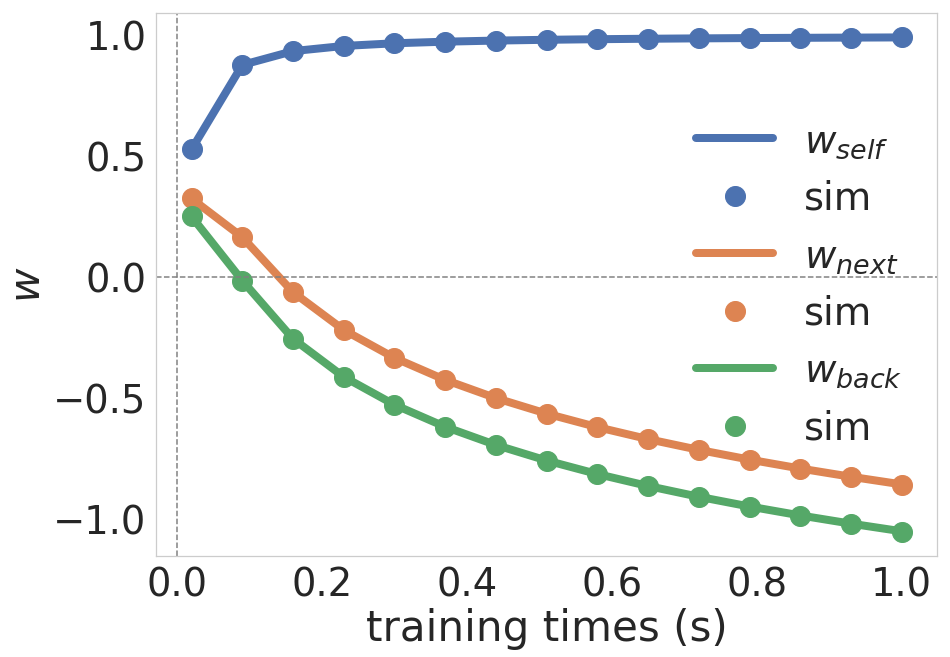

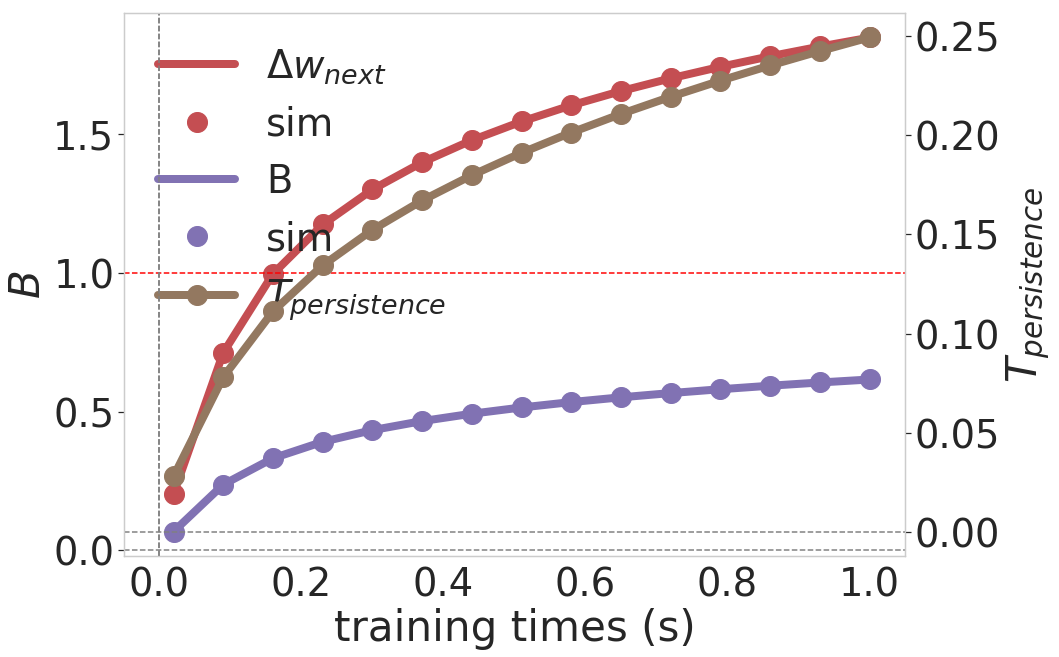

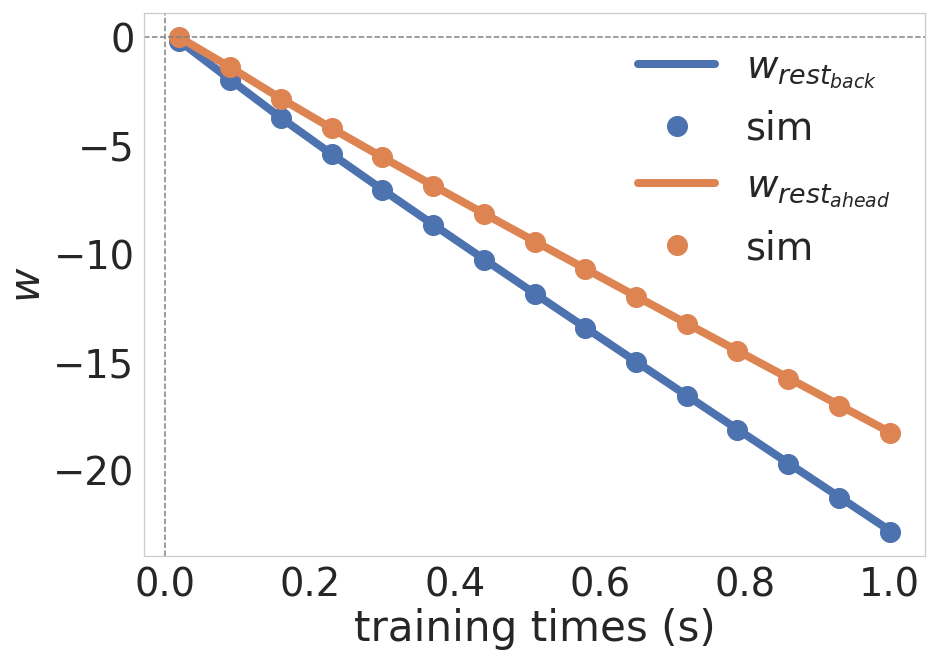

In [49]:
results_dictionary = tt_dictionary
plot_weights(results_dictionary)
ax = plot_B(results_dictionary, ax=None, legend=False)
axt = ax.twinx()
axt = plot_persistent_times(results_dictionary, ax=axt, legend=False);
h1, l1 = ax.get_legend_handles_labels()
h2, l2 = axt.get_legend_handles_labels()
ax.legend(h1+h2, l1+l2, frameon=False)
plot_rest_weights(results_dictionary, ax=None, legend=True);

### inter-pulse-interval

In [39]:
%%time

input_vector = np.linspace(0.0, 0.100, num=num)
xlabel = 'IPI (s)'

values_dictionary = {name:np.zeros(num) for name in values_to_save_string}
values_dictionary['input'] = input_vector
values_dictionary['xlabel'] = xlabel


for index, ipi in enumerate(input_vector):
    dic = calculate_connectivites(tt=training_times, ipi=ipi, tau_z_pre=tau_z_pre, tau_z_post=tau_z_post)
    for key in values_to_save_string:
        values_dictionary[key][index] = dic[key]

ipi_dictionary = values_dictionary

../network.py:498: RuntimeWarning: invalid value encountered in log
  self.T = self.nn.tau_a * np.log(1 / (1 - self.B))
../network.py:502: RuntimeWarning: invalid value encountered in less
  self.T[self.T < 0] = 0.0


CPU times: user 9.86 s, sys: 428 ms, total: 10.3 s
Wall time: 2.84 s


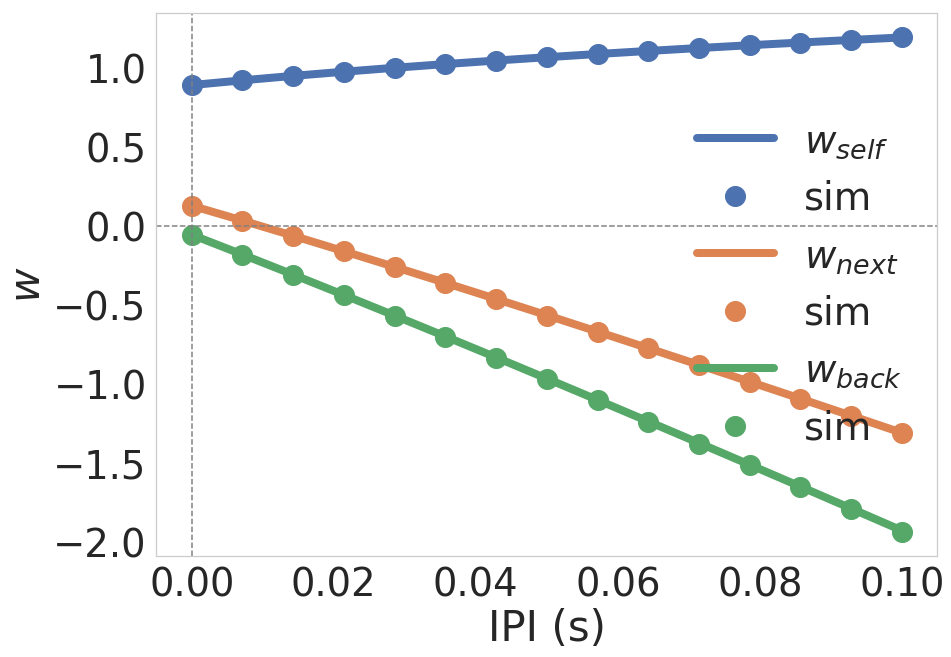

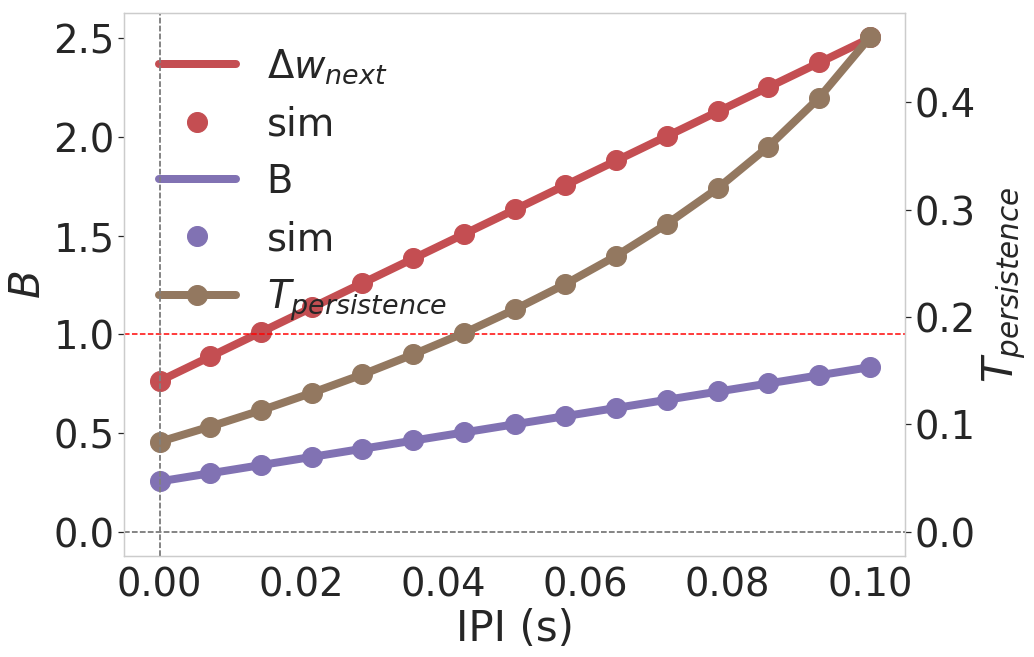

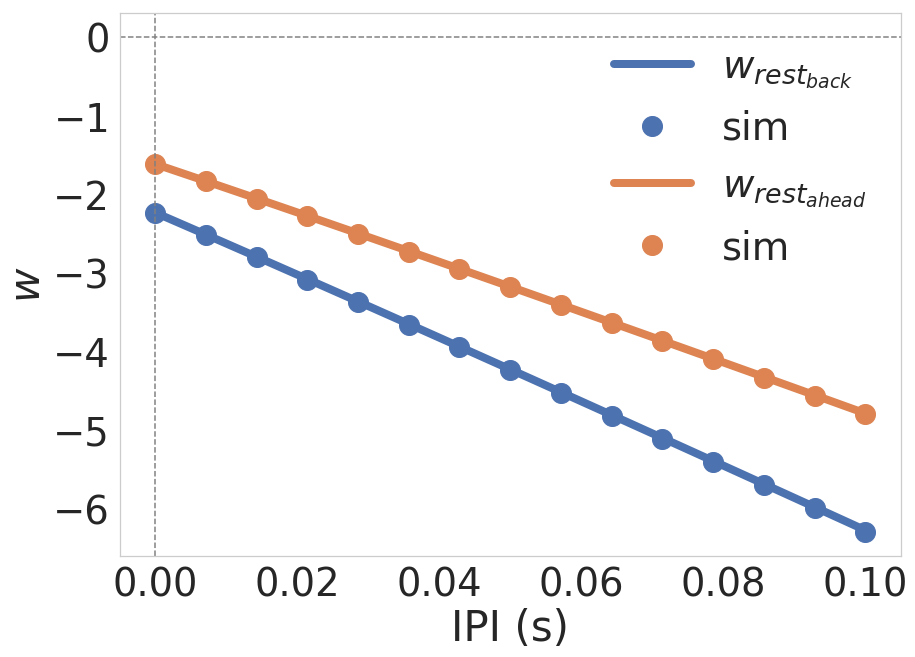

In [48]:
results_dictionary = ipi_dictionary
plot_weights(results_dictionary)
ax = plot_B(results_dictionary, ax=None, legend=False)
axt = ax.twinx()
axt = plot_persistent_times(results_dictionary, ax=axt, legend=False);
h1, l1 = ax.get_legend_handles_labels()
h2, l2 = axt.get_legend_handles_labels()
ax.legend(h1+h2, l1+l2, frameon=False)
plot_rest_weights(results_dictionary, ax=None, legend=True);

### Tau_z

In [41]:
%%time

input_vector = np.linspace(0.005, 0.150, num=num)
xlabel = r'$\tau_{z_{pre}}$ (s)'

values_dictionary = {name:np.zeros(num) for name in values_to_save_string}
values_dictionary['input'] = input_vector
values_dictionary['xlabel'] = xlabel


for index, tau_z_pre in enumerate(input_vector):
    dic = calculate_connectivites(tt=training_times, ipi=inter_pulse_interval,
                                  tau_z_pre=tau_z_pre, tau_z_post=tau_z_post)
    for key in values_to_save_string:
        values_dictionary[key][index] = dic[key]

tau_z_dictionary = values_dictionary

../network.py:498: RuntimeWarning: invalid value encountered in log
  self.T = self.nn.tau_a * np.log(1 / (1 - self.B))
../network.py:502: RuntimeWarning: invalid value encountered in less
  self.T[self.T < 0] = 0.0


CPU times: user 5.62 s, sys: 168 ms, total: 5.79 s
Wall time: 2.01 s


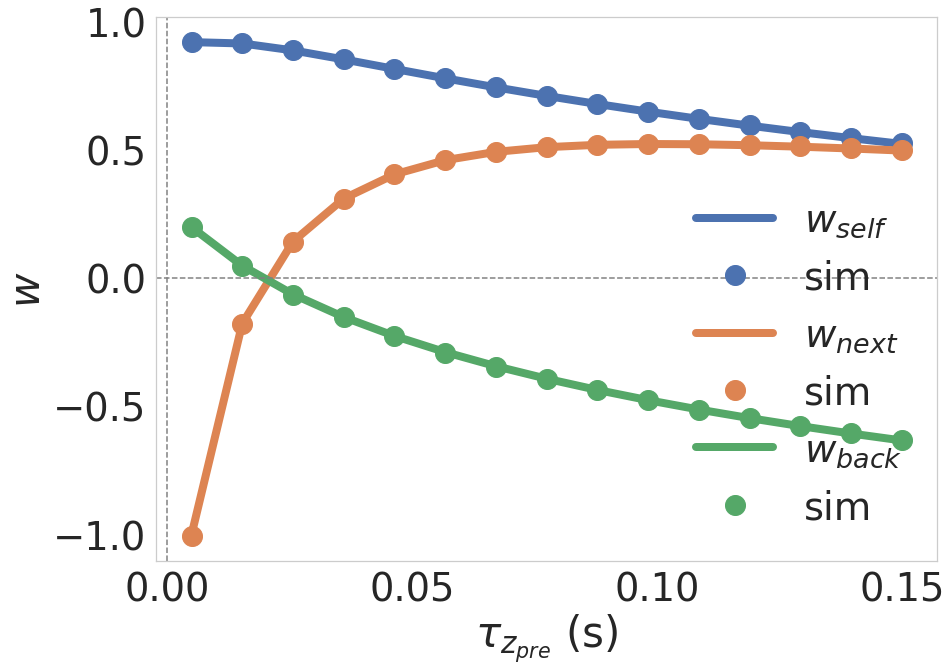

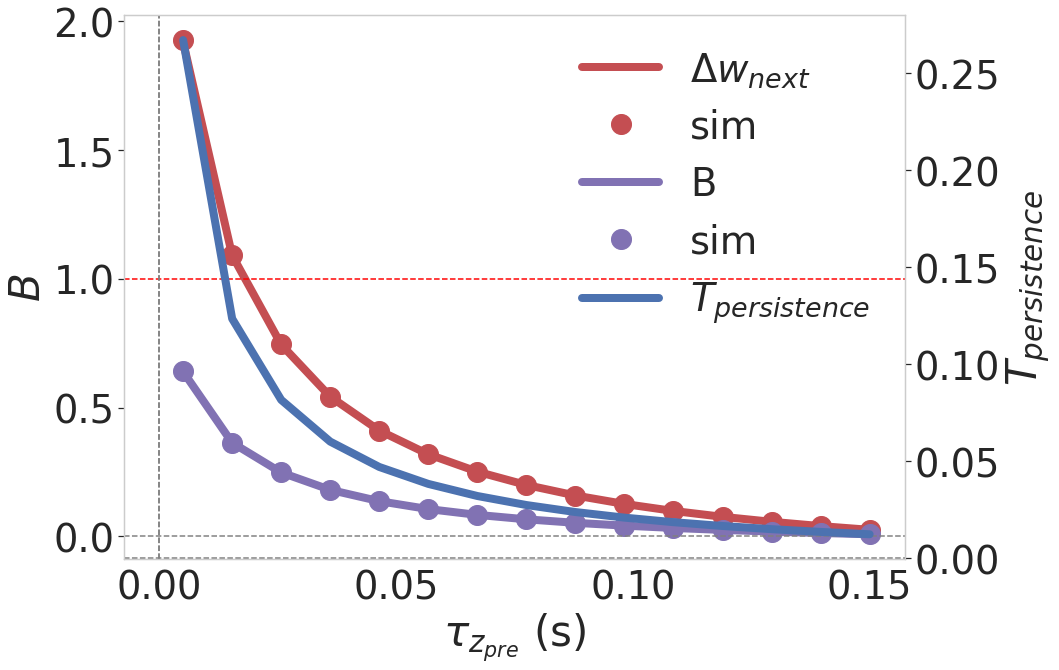

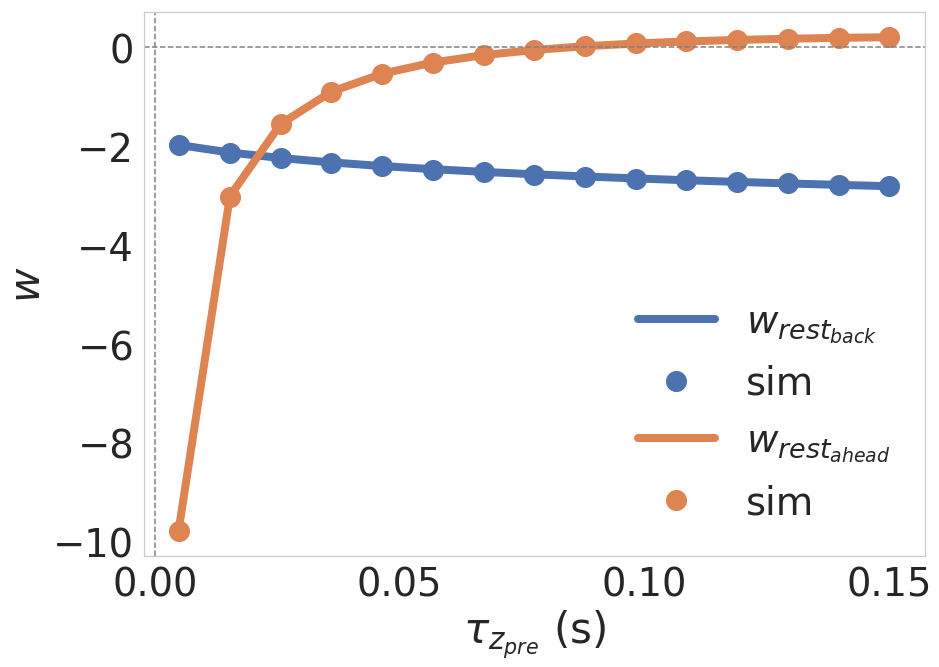

In [45]:
results_dictionary = tau_z_dictionary
plot_weights(results_dictionary)
ax = plot_B(results_dictionary, ax=None, legend=False)
axt = ax.twinx()
axt = plot_persistent_times(results_dictionary, ax=axt, legend=False);
h1, l1 = ax.get_legend_handles_labels()
h2, l2 = axt.get_legend_handles_labels()
ax.legend(h1+h2, l1+l2, frameon=False)
plot_rest_weights(results_dictionary, ax=None, legend=True)


# The general plot

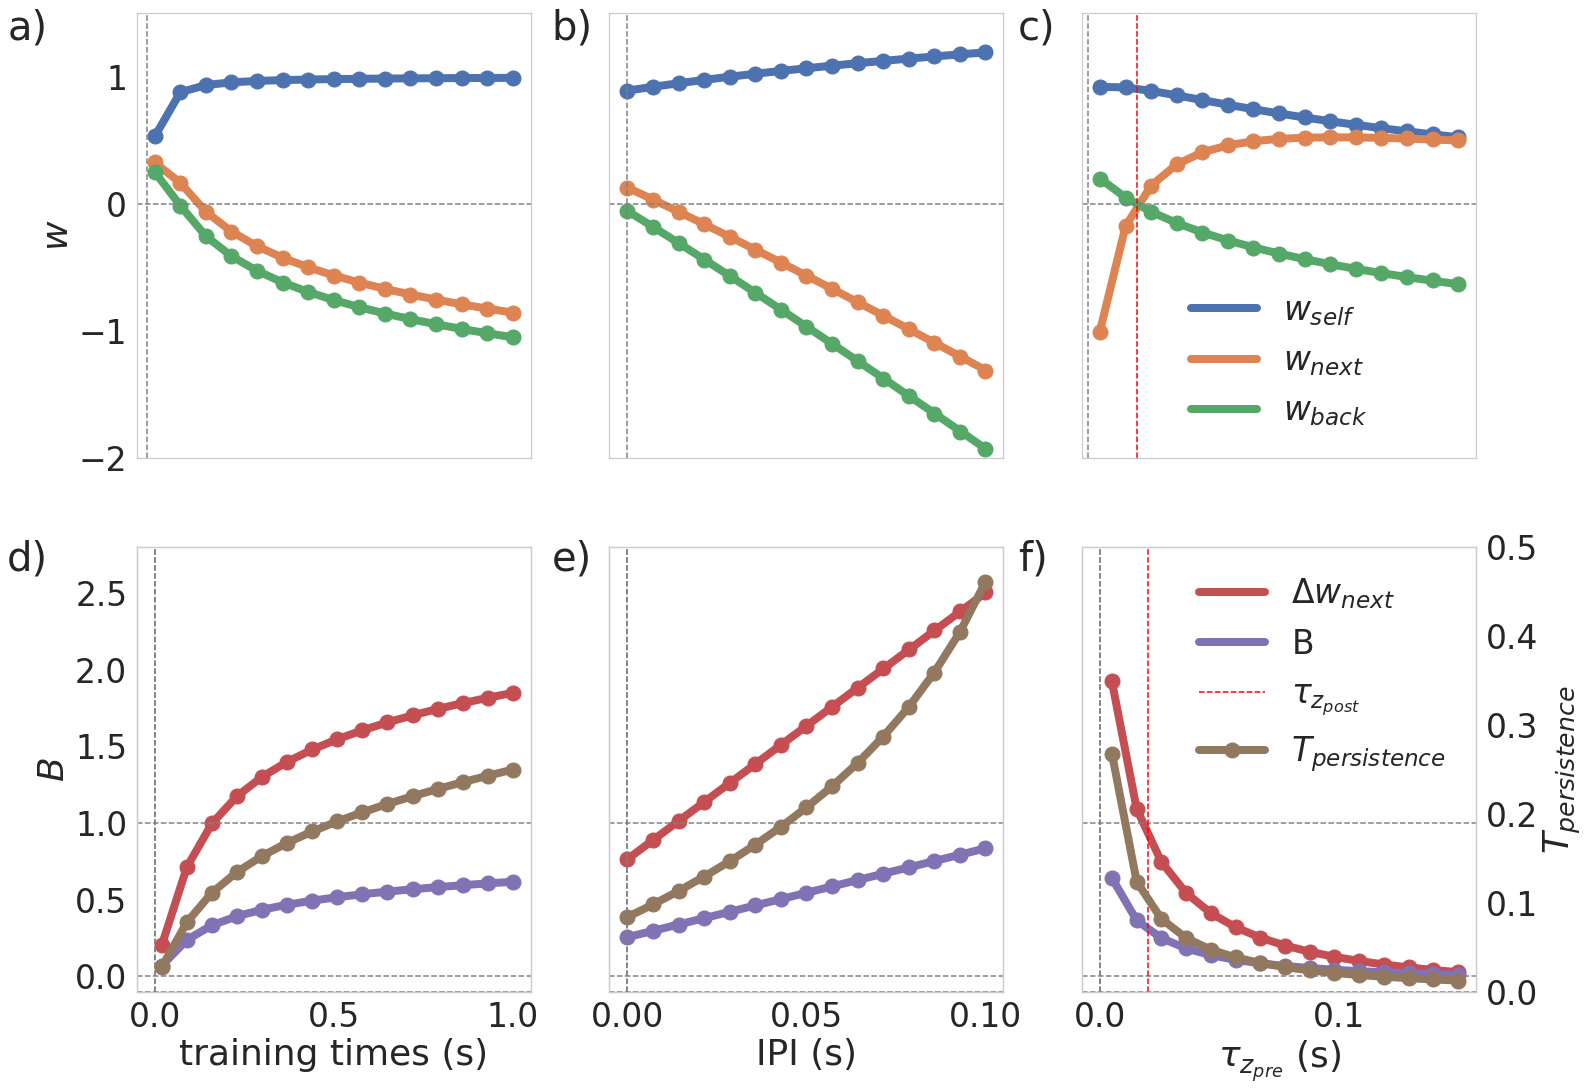

In [86]:
sns.set(font_scale=3.0)
sns.set_style("whitegrid", {'axes.grid': False})
size_factor = 1.5

lw = 8
ms = 15
save = True
captions = True
size = 10
legend = False
both_labels = False   # This controls that only the the labels for the theoretical points appear.
ylim = [-2.0, 1.5]
Bylim = [-0.1, 2.8]
Tlim= [0.0, 0.500]
plot_persistences = True

fig = plt.figure(figsize=(int(size_factor * 16), int(size_factor * 12)))
gs = gridspec.GridSpec(2, 3)

#################
# Training time
################
results_dictionary = tt_dictionary

ax11 = fig.add_subplot(gs[0, 0])
ax11 = plot_weights(results_dictionary, ax=ax11, legend=legend, x_label=False)
ax11.set_ylim(ylim)
ax11.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

ax21 = fig.add_subplot(gs[1, 0])
ax21 = plot_B(results_dictionary, ax=ax21, legend=legend);
ax21.set_ylim(Bylim)

if plot_persistences:
    axt21 = ax21.twinx()
    axt21 = plot_persistent_times(results_dictionary, ax=axt21, y_label=False, legend=False);
    axt21.set_ylim(Tlim)
    axt21.tick_params(axis='both', which='both', bottom=False, left=False, right=False, labelright=False)

ax21.tick_params(axis='y', which='both', left=False, right=False)

###############
# IPI
###############
results_dictionary = ipi_dictionary

ax12 = fig.add_subplot(gs[0, 1])
ax12 = plot_weights(results_dictionary, ax=ax12, legend=legend, x_label=False, y_label=False)
ax12.set_ylim(ylim)
ax12.tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=False, labelleft=False)



ax22 = fig.add_subplot(gs[1, 1])
ax22 = plot_B(results_dictionary, ax=ax22, legend=legend, y_label=False);
ax22.set_ylim(Bylim)

if plot_persistences:
    axt22 = ax22.twinx()
    axt22 = plot_persistent_times(results_dictionary, ax=axt22, y_label=False, legend=False);
    axt22.set_ylim(Tlim)
    axt22.tick_params(axis='both', which='both', bottom=False, left=False, right=False, labelright=False)


ax22.tick_params(axis='y', which='both', left=False, bottom=False, labelleft=False)

#######################
# tau_z
######################3
results_dictionary = tau_z_dictionary

ax13 = fig.add_subplot(gs[0, 2])
ax13 = plot_weights(results_dictionary, ax=ax13, legend=True, x_label=False, y_label=False, both_labels=both_labels)
ax13.axvline(tau_z_post, ls='--', color='red', label=r'$\tau_{z_{post}}$')
ax13.set_ylim(ylim)
ax13.tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=False, labelleft=False)


ax23 = fig.add_subplot(gs[1, 2])
ax23 = plot_B(results_dictionary, ax=ax23, legend=False, y_label=False, both_labels=both_labels);
ax23.axvline(tau_z_post, ls='--', color='red', label=r'$\tau_{z_{post}}$')
ax23.set_ylim(Bylim)
# ax23.set_xlim([-0.010, 0.180])

if plot_persistences:
    axt23 = ax23.twinx()
    axt23 = plot_persistent_times(results_dictionary, ax=axt23,  legend=False);
    axt23.set_ylim(Tlim)
    axt23.tick_params(axis='y', which='both', left=False, bottom=False, top=False, right=False)

    
    h1, l1 = ax23.get_legend_handles_labels()
    h2, l2 = axt23.get_legend_handles_labels()
    ax23.legend(h1+h2, l1+l2, frameon=False)
else:
    ax23.legend(frameon=False)
    
ax23.tick_params(axis='y', which='both', left=False, bottom=False, top=False, labelleft=False)




if captions:
    size = 40
    xpoint1 = 0.05
    xpoint2 = 0.365
    xpoint3 = 0.635
    
    ypoint1 = 0.86
    ypoint2 = 0.45
    
    fig.text(xpoint1, ypoint1, 'a)', size=size)
    fig.text(xpoint2, ypoint1, 'b)', size=size)
    fig.text(xpoint3, ypoint1, 'c)', size=size)
    
    fig.text(xpoint1, ypoint2, 'd)', size=size)
    fig.text(xpoint2, ypoint2, 'e)', size=size)
    fig.text(xpoint3, ypoint2, 'f)', size=size)

if save:
    directory = '../plot_producers/'
    file_name = 'training' 
    format_string = '.pdf'
    string_to_save = directory + file_name + format_string
    fig.savefig(string_to_save, frameon=False, dpi=110, bbox_inches='tight')